<a href="https://colab.research.google.com/github/fgd806/CompBioProject/blob/master/Local_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

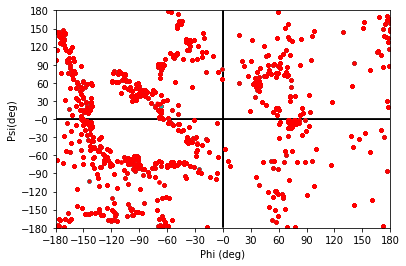

In [4]:
"""#4 Analyze the torsion angles in each type of helices. Build something similar to
Ramachandran plot but for different types of helices"""

# Sequence in remark must be greater than or equal to the
# lower bound of the helix and less than or equal to the 
# upper bound of the helix

#if the number of the sequence is less than lower bound then
# go to the next sequence

#else if the sequence is greater than the upper bound then go to the next
#Helix sequence

#else get the type of the helix and plot the torsion angle in ramachandran plot

from google.colab import files 
from google.colab import drive
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import re
import sys

#import urlib.request

data_path = 'cullpdb_pc30_res3.0_R1.0_d191017_chains18877.gz'

# This just opens the data set and prints out the contents line by line
pdbIds = []
acids_in_beta_sheets = []
count_coordinates = 0
with open(data_path, 'r') as f:
    lines = f.read()
    #print(lines)

i = 0
    
for line in lines.split('\n'):
  if line[0:3] != 'IDs':
    pdbIds.append(line[0:5])
    i+=1
  if i==100:
    break

helix_lines = []
remark_lines = []

i = 0
for id in pdbIds:
  
  sum = 0
  pdb = id[0:4]
  chain = id[-1].upper()
  url = 'https://files.rcsb.org/download/'+pdb+'.pdb'
  fileName = pdb + '.pdb'
  file = urllib.request.urlretrieve(url,fileName)
  pdbFile = open(fileName, "r")
  fileContents = pdbFile.readlines()
  for line in fileContents:
    
    if(line[:6] == 'REMARK'):
      remark_info = line.split()
      if(len(remark_info) == 7 and remark_info[1] == '500' and remark_info[6] != "SIDE_CHAIN"
                          and remark_info[6] != "TYPE" and remark_info[6] != "CODE)."
                          and remark_info[6] != "PHI" and remark_info[3] == str(chain)):
        
        count_coordinates+=1
        remark_lines.append(line)
    if(line[:5] == 'HELIX' and line[19] == chain):
      helix_lines.append(line)
      info = line.split()
      lower_bound = info[5]
      upper_bound = info[8]
      i+=1 
   
  
  



for i in range(count_coordinates - 1):
  coordinate_line = remark_lines[i].split()
  
sum = 0

helix_type = []
for helix in helix_lines:
  info = helix.split()
  lower_bound = info[5]
  upper_bound = info[8]
  
  if(info[4]) == str(chain):
    for angle in remark_lines:
      info2 = angle.split()
      seq = info2[4]
      if seq < lower_bound:
        continue
      if seq > upper_bound:
        pass
      else:
        num = info[9]
        if(num.isdigit()): 
          helix_type.append(num)
        else:
          real_num = re.split('[a-zA-Z]', num)[0]
          helix_type.append(real_num)
        sum+=1

phi = np.zeros(sum)
psi = np.zeros(sum)

i = 0
for helix in helix_lines:
  info = helix.split()
  lower_bound = info[5]
  upper_bound = info[8]
  
  
  if(info[4]) == str(chain):
    for angle in remark_lines:
      info2 = angle.split()
      
      seq = info2[4]
      if seq < lower_bound:
        continue
      if seq > upper_bound:
        pass
      else:
        phi[i] = info2[6]
        psi[i] = info2[5]
        i+=1

plot_2_arrays(phi, psi, "Phi (deg)", "Psi(deg)", helix_type)



In [0]:
def plot_2_arrays(x, y, x_label_in, y_label_in, hel_type):
  """Function to plot two one-dimensional arrays"""
  # Import libraries
  # Generate plot
  i = 0
  for num in hel_type:
    col = numbers_to_colors(int(num))
    #print(col)
    plt.plot(x[i], y[i], col + ".")
    i += 1

  #plt.plot(0, 0, "b.")
  plt.xlim(-180, 180)
  plt.ylim(-180, 180)
  plt.xticks(np.arange(-180.1, 180.1, 30)) # Sets ticks markers for x axis
  plt.yticks(np.arange(-180.1, 180.1, 30)) # Sets ticks markers for y axis
  plt.xlabel(x_label_in) # Adds axis label
  plt.ylabel(y_label_in) # Adds axis label
  plt.arrow(-180, 0, 360, 0)
  plt.arrow(0, -180, 0, 360) # Creates an arrow

  # Show plot
  plt.show()

In [0]:
def numbers_to_colors(argument): 
    switcher = { 
        1: "r", 
        2: "b",
        3: "g",
        4: "k",
        5: "c",
        6: "m",
        7: "y",
        8: "pink",
        9: "darkolivegreen",
        10: "brown" 
    } 
    return switcher.get(argument, "nothing")

In [0]:
from google.colab import files 
from google.colab import drive
import urllib.request
import sys

#import urlib.request

data_path = 'cullpdb_pc30_res3.0_R1.0_d191017_chains18877.gz'

# This just opens the data set and prints out the contents line by line
pdbIds = []
acids_in_beta_sheets = []
with open(data_path, 'r') as f:
    lines = f.read()
    #print(lines)

i = 0
    
for line in lines.split('\n'):
  if line[0:3] != 'IDs':
    pdbIds.append(line[0:5])
    i+=1
  if i==100:
    break


for id in pdbIds:
  #print(pdb)
  sum = 0
  pdb = id[0:4]
  chain = id[-1].upper()
  url = 'https://files.rcsb.org/download/'+pdb+'.pdb'
  fileName = pdb + '.pdb'
  file = urllib.request.urlretrieve(url,fileName)
  pdbFile = open(fileName, "r")
  fileContents = pdbFile.readlines()
  for line in fileContents:
    
    if(line[:5] == 'SHEET'):
      info = line.split()
      amino_acid = line[17:21]
      if amino_acid not in acids_in_beta_sheets:
        acids_in_beta_sheets.append(amino_acid)
      num = info[3]
      if num.isdigit():
        sum+=int(num)
      else:
        next
  print("In file " + str(fileName) + " there are " + str(sum) + " beta strands.")
print("Strands that prefer to be in beta sheets:")
print("\n".join(acids_in_beta_sheets))


#print(pdbIds)

In file 12AS.pdb there are 136 beta strands.
In file 16VP.pdb there are 9 beta strands.
In file 19HC.pdb there are 16 beta strands.
In file 1A0A.pdb there are 0 beta strands.
In file 1A0I.pdb there are 63 beta strands.
In file 1A0T.pdb there are 36 beta strands.
In file 1A1X.pdb there are 81 beta strands.
In file 1A2P.pdb there are 48 beta strands.
In file 1A2X.pdb there are 8 beta strands.
In file 1A3A.pdb there are 16 beta strands.
In file 1A41.pdb there are 13 beta strands.
In file 1A5T.pdb there are 25 beta strands.
In file 1A62.pdb there are 25 beta strands.
In file 1A73.pdb there are 34 beta strands.
In file 1A7J.pdb there are 64 beta strands.
In file 1A8L.pdb there are 34 beta strands.
In file 1A92.pdb there are 0 beta strands.
In file 1A9X.pdb there are 858 beta strands.
In file 1A9X.pdb there are 858 beta strands.
In file 1AB8.pdb there are 68 beta strands.
In file 1ABA.pdb there are 16 beta strands.
In file 1AC5.pdb there are 4 beta strands.
In file 1ACF.pdb there are 49 beta

KeyboardInterrupt: ignored